<a href="https://colab.research.google.com/github/taetae991202/Practice_sklearn/blob/main/%ED%9A%8C%EA%B7%80%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree


In [8]:
housing = pd.read_csv('/content/drive/MyDrive/지능형시스템/housing.data', header=None, sep='\s+')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

reg = DecisionTreeRegressor(
            criterion = 'squared_error', ## “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
            splitter='best', ## 'random'
            max_depth=3, ## '최대 깊이'
            min_samples_leaf=10, ## 최소 끝마디 샘플 수
            random_state=100
        )

reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=100)

In [10]:
print(reg.predict(X)[:3])

[22.6506383  22.6506383  35.24782609]


In [11]:
for i, col in enumerate(X.columns):
  print(f'{col} 중요도 : {reg.feature_importances_[i]}')

print(reg.get_params())
print('정확도: ', reg.score(X, y))

CRIM 중요도 : 0.03439671315633016
ZN 중요도 : 0.0
INDUS 중요도 : 0.0
CHAS 중요도 : 0.0
NOX 중요도 : 0.0
RM 중요도 : 0.6777780289645137
AGE 중요도 : 0.0
DIS 중요도 : 0.0
RAD 중요도 : 0.0
TAX 중요도 : 0.0
PTRATIO 중요도 : 0.008594584926950963
B 중요도 : 0.0
LSTAT 중요도 : 0.2792306729522052
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
정확도:  0.7737076435842268


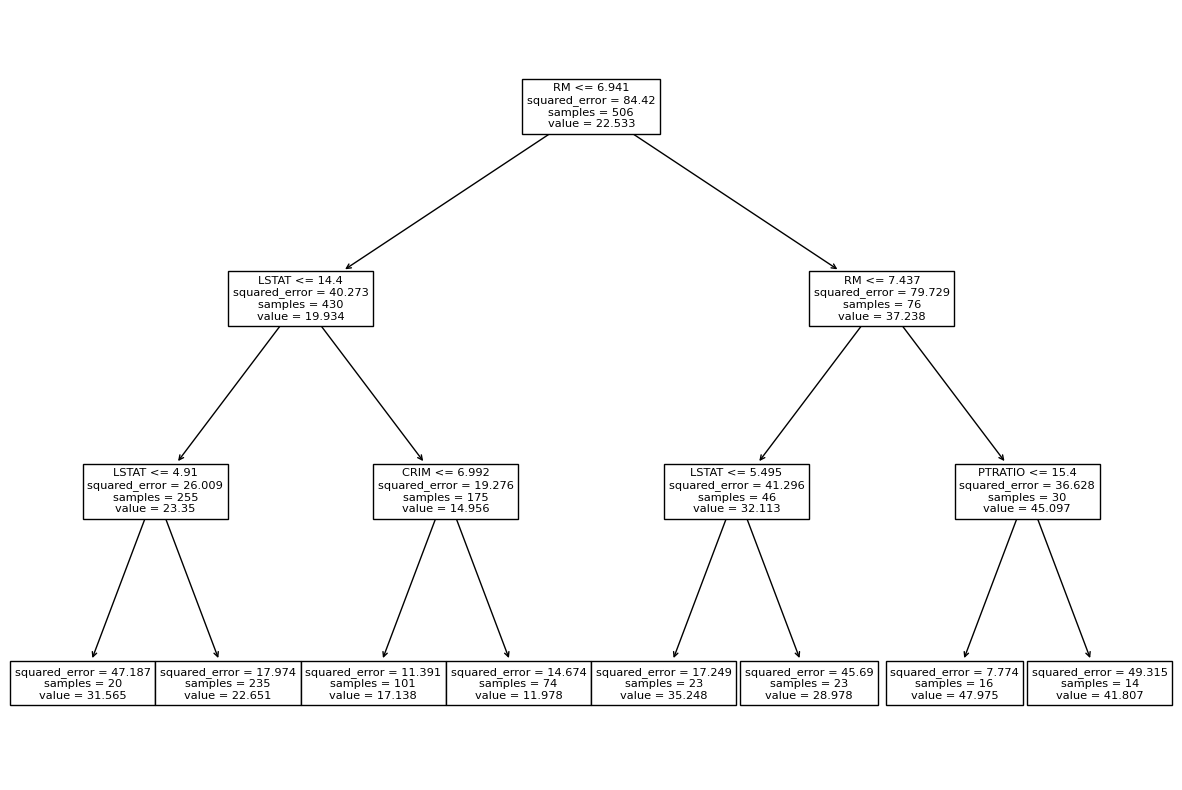

In [12]:
fig = plt.figure(figsize=(15, 10), facecolor='white')
plot_tree(reg,
          feature_names=X.columns, ## 박스에 변수 이름 표시
         )
plt.show()